In [1]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## NN libs
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import keras
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Activation, Conv1D, Conv2D, Dropout, Flatten
from keras.layers import Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D, UpSampling1D, MaxPooling1D
from keras.layers import LocallyConnected1D, LocallyConnected2D
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.callbacks import TensorBoard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [20]:
context = data.init()
n = 2
multiTrack = False
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Hat.mid
 [INFO] : 
 |  reading file: ../datasets/examples/02 8th Cym.mid
 [INFO] : 
 |  reading file: ../datasets/examples/114_LetsDance_DavidBowie1.mid
 [INFO] : 
 |  reading file: ../datasets/examples/127_SweetChildOMine_GunsAndRoses1.mid
 [INFO] : 
 |  reading file: ../datasets/examples/92_GiveItAway_TheRedHotChiliPeppers.mid
 [INFO] : 
 |  reading file: ../datasets/examples/94_Creep_Radiohead2.mid
 [INFO] : 
 |  reading file: ../datasets/examples/boss

In [54]:
n = 100
min_f = 3
max_f = 20
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
y_train = x_train

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9937500000000004
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.999999999999998
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9916666666666663
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.992708333333334
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.991666666666668
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9989583333333365
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.010416666666675
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.993750000000001
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0104166666666647
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9968750000000033
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0020833333333345
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0041666666666664
 |>  150
 [DEBUG] 

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0052083333333344
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.998958333333337
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.992708333333338
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.001041666666668
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9906250000000005
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.993750000000001
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9916666666666636
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9916666666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.994791666666668
 |>  150


In [21]:
x_train.shape

(22, 150, 1)

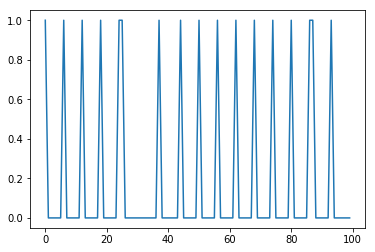

In [22]:
plt.plot(x_train[0,:100])

In [64]:
x_train.shape

(275, 150, 1)

In [149]:
n_samples = x_train[0]
input_shape = x_train.shape[1:] # shape of a single sample
output_shape = y_train.shape[1:] # shape of a single sample
# output_length = y_train.shape[1:][0]
hidden_layer_length = 30
input_shape

(150, 1)

In [150]:
output_shape

(150, 1)

In [151]:
num_encoder_tokens = x_train.shape[-1]
num_decoder_tokens = y_train.shape[-1]
# latent_dim = 1

In [159]:
k_reg = regularizers.l2(0.01)
# b_reg = regularizers.l1(0.01)
a_reg = regularizers.l1(0.01)

def encoder(input_shape, output_length, dropout=0.10):
    input_layer = Input(shape=input_shape)
    x = input_layer
    
    w1 = input_shape[0] * 2
    w2 = w1 * 2
    print('w1', w1,'w2', w2)

    # [Conv | Pool]
#     x = Conv1D(w1, kernel_size=2, strides=2, activation='relu', padding='same')(x)
#     x = Conv1D(w1, kernel_size=2, strides=1, activation='relu', padding='same')(x)
#     x = MaxPooling1D(pool_size=2, strides=2)(x)
    
#     x = Conv1D(w2, kernel_size=2, strides=2, activation='relu')(x)
#     x = Conv1D(w2, kernel_size=2, strides=1, activation='relu')(x)
#     x = MaxPooling1D(pool_size=2, strides=2)(x)
    
    # [Dense]
    x = Flatten()(x)
    x = Dense(1000, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(dropout)(x)
    
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)    
    x = Dropout(dropout)(x)

    x = Dense(100, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(x)

#     x = Dense(1000, activation='relu')(x)
#     x = Dense(1000, activation='relu')(x)
#     x = Dropout(dropout)(x)
    
#     x = Dense(100, activation='relu')(x)
#     x = Dense(100, activation='relu')(x)
#     x = Dropout(dropout)(x)    
    
    x = Dense(output_length, activation='sigmoid')(x)
#     x = Dense(output_length, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def decoder(input_length, output_shape, dropout=0.10):
    input_layer = Input(shape=(input_length,))
    x = input_layer
    shape = output_shape
    # shape = (10,100) # increase n dimensions
    
    x = Dense(100, activation='relu')(x)
    x = Dense(1000, activation='relu')(x)
    x = Dropout(dropout)(x)
    
    x = Reshape((250,4))(x) # 250 * 4 = 1000
    x = UpSampling1D(4)(x)
    x = Conv1D(10, kernel_size=2, strides=1, activation='relu', padding='same')(x)
    x = Conv1D(10, kernel_size=2, strides=1, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2, strides=2)(x)
    
    x = Flatten()(x)
    dims = keras.backend.int_shape(x)
    print('dims', dims)
    
#     x = Reshape((1000,1))(x)

    x = Dense(200, activation='relu')(x)
    x = Dense(200, activation='relu')(x)
    x = Dense(100, activation='relu')(x)    
    x = Dropout(dropout)(x)

    x = Dense(100, activation='relu')(x)        
    x = Dense(np.prod(shape), activation='relu')(x)
    x = Dropout(dropout)(x)
    
    x = Dense(np.prod(shape), activation='sigmoid')(x)
    x = Reshape(shape)(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def autoencoder(input_shape, output_shape, hidden_layer_length=10, dropout=0.10, verbose=False):
    input_ = Input(shape=input_shape)
    encode = encoder(input_shape, hidden_layer_length, dropout)
    if verbose:
        encode.summary()
    decode = decoder(hidden_layer_length, output_shape, dropout)
    if verbose:
        decode.summary()
    model = Model(input_, decode(encode(input_)))
    return encode, decode, model

dropout = 0.2
encoder, decoder, model = autoencoder(input_shape, output_shape, hidden_layer_length, dropout, True)

w1 300 w2 600
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_111 (InputLayer)       (None, 150, 1)            0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 150)               0         
_________________________________________________________________
dense_335 (Dense)            (None, 1000)              151000    
_________________________________________________________________
dense_336 (Dense)            (None, 100)               100100    
_________________________________________________________________
dropout_107 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_337 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_338 (Dense)            (None, 100)               10100  

In [160]:
metrics = ['accuracy','mse','binary_crossentropy'] # sparse_categorical_accuracy
loss = 'binary_crossentropy'# binary_crossentropy categorical_crossentropy sparse_categorical_crossentropy
optimizer = 'adam' # adam adadelta rmsprop nadam
# keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=optimizer, loss=loss, metrics=['mse', 'mae', 'accuracy'])#, metrics=metrics)

In [161]:
batch_size = 16
# n epochs = n iterations over all the training data
epochs = 30

In [162]:
callbacks = []
callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]
vs = 1/6
m = 100
# model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[TensorBoard(log_dir=config.tmp_log_dir)])
history = model.fit(x_train[:m],x_train[:m], epochs=epochs, batch_size=batch_size,
          validation_split=vs, callbacks=callbacks)

Train on 8 samples, validate on 2 samples
Epoch 1/300
8/8 [==============================] - 2s 303ms/step - loss: 2.0244 - mean_squared_error: 0.2500 - mean_absolute_error: 0.5000 - acc: 0.5033 - val_loss: 1.7104 - val_mean_squared_error: 0.2495 - val_mean_absolute_error: 0.4995 - val_acc: 0.5767
Epoch 2/300
8/8 [==============================] - 0s 5ms/step - loss: 1.8208 - mean_squared_error: 0.2495 - mean_absolute_error: 0.4995 - acc: 0.5800 - val_loss: 1.6871 - val_mean_squared_error: 0.2486 - val_mean_absolute_error: 0.4985 - val_acc: 0.6033
Epoch 3/300
8/8 [==============================] - 0s 8ms/step - loss: 1.7647 - mean_squared_error: 0.2487 - mean_absolute_error: 0.4987 - acc: 0.5733 - val_loss: 1.6657 - val_mean_squared_error: 0.2469 - val_mean_absolute_error: 0.4968 - val_acc: 0.6100
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 1.7179 - mean_squared_error: 0.2472 - mean_absolute_error: 0.4970 - acc: 0.6000 - val_loss: 1.6429 - val_mean_squared_er

Epoch 33/300
8/8 [==============================] - 0s 8ms/step - loss: 1.0945 - mean_squared_error: 0.1658 - mean_absolute_error: 0.3266 - acc: 0.7667 - val_loss: 1.0747 - val_mean_squared_error: 0.1580 - val_mean_absolute_error: 0.3167 - val_acc: 0.7767
Epoch 34/300
8/8 [==============================] - 0s 6ms/step - loss: 1.0683 - mean_squared_error: 0.1608 - mean_absolute_error: 0.3156 - acc: 0.7758 - val_loss: 1.0664 - val_mean_squared_error: 0.1582 - val_mean_absolute_error: 0.3105 - val_acc: 0.7767
Epoch 35/300
8/8 [==============================] - 0s 6ms/step - loss: 1.0894 - mean_squared_error: 0.1722 - mean_absolute_error: 0.3160 - acc: 0.7567 - val_loss: 1.0569 - val_mean_squared_error: 0.1587 - val_mean_absolute_error: 0.3139 - val_acc: 0.7767
Epoch 36/300
8/8 [==============================] - 0s 5ms/step - loss: 1.0575 - mean_squared_error: 0.1644 - mean_absolute_error: 0.3151 - acc: 0.7633 - val_loss: 1.0468 - val_mean_squared_error: 0.1593 - val_mean_absolute_error: 0

8/8 [==============================] - 0s 7ms/step - loss: 0.8085 - mean_squared_error: 0.1622 - mean_absolute_error: 0.3260 - acc: 0.7633 - val_loss: 0.8213 - val_mean_squared_error: 0.1612 - val_mean_absolute_error: 0.3302 - val_acc: 0.8100
Epoch 66/300
8/8 [==============================] - 0s 6ms/step - loss: 0.7907 - mean_squared_error: 0.1581 - mean_absolute_error: 0.3247 - acc: 0.7642 - val_loss: 0.8157 - val_mean_squared_error: 0.1606 - val_mean_absolute_error: 0.3251 - val_acc: 0.8100
Epoch 67/300
8/8 [==============================] - 0s 6ms/step - loss: 0.8136 - mean_squared_error: 0.1687 - mean_absolute_error: 0.3302 - acc: 0.7667 - val_loss: 0.8102 - val_mean_squared_error: 0.1604 - val_mean_absolute_error: 0.3230 - val_acc: 0.8100
Epoch 68/300
8/8 [==============================] - 0s 6ms/step - loss: 0.7849 - mean_squared_error: 0.1605 - mean_absolute_error: 0.3167 - acc: 0.7675 - val_loss: 0.8050 - val_mean_squared_error: 0.1604 - val_mean_absolute_error: 0.3220 - val_a

Epoch 98/300
8/8 [==============================] - 0s 6ms/step - loss: 0.6459 - mean_squared_error: 0.1598 - mean_absolute_error: 0.3156 - acc: 0.7700 - val_loss: 0.6766 - val_mean_squared_error: 0.1614 - val_mean_absolute_error: 0.3227 - val_acc: 0.7833
Epoch 99/300
8/8 [==============================] - 0s 6ms/step - loss: 0.6511 - mean_squared_error: 0.1642 - mean_absolute_error: 0.3236 - acc: 0.7625 - val_loss: 0.6734 - val_mean_squared_error: 0.1614 - val_mean_absolute_error: 0.3223 - val_acc: 0.7900
Epoch 100/300
8/8 [==============================] - 0s 6ms/step - loss: 0.6479 - mean_squared_error: 0.1635 - mean_absolute_error: 0.3222 - acc: 0.7717 - val_loss: 0.6699 - val_mean_squared_error: 0.1615 - val_mean_absolute_error: 0.3236 - val_acc: 0.7833
Epoch 101/300
8/8 [==============================] - 0s 6ms/step - loss: 0.6460 - mean_squared_error: 0.1639 - mean_absolute_error: 0.3185 - acc: 0.7758 - val_loss: 0.6658 - val_mean_squared_error: 0.1620 - val_mean_absolute_error:

Epoch 130/300
8/8 [==============================] - 0s 6ms/step - loss: 0.5655 - mean_squared_error: 0.1611 - mean_absolute_error: 0.3241 - acc: 0.7767 - val_loss: 0.5976 - val_mean_squared_error: 0.1612 - val_mean_absolute_error: 0.3232 - val_acc: 0.7967
Epoch 131/300
8/8 [==============================] - 0s 6ms/step - loss: 0.5681 - mean_squared_error: 0.1636 - mean_absolute_error: 0.3190 - acc: 0.7717 - val_loss: 0.5961 - val_mean_squared_error: 0.1609 - val_mean_absolute_error: 0.3216 - val_acc: 0.7967
Epoch 132/300
8/8 [==============================] - 0s 7ms/step - loss: 0.5629 - mean_squared_error: 0.1620 - mean_absolute_error: 0.3193 - acc: 0.7708 - val_loss: 0.5940 - val_mean_squared_error: 0.1608 - val_mean_absolute_error: 0.3217 - val_acc: 0.8033
Epoch 133/300
8/8 [==============================] - 0s 6ms/step - loss: 0.5630 - mean_squared_error: 0.1621 - mean_absolute_error: 0.3181 - acc: 0.7692 - val_loss: 0.5912 - val_mean_squared_error: 0.1609 - val_mean_absolute_erro

Epoch 162/300
8/8 [==============================] - 0s 7ms/step - loss: 0.5289 - mean_squared_error: 0.1631 - mean_absolute_error: 0.3134 - acc: 0.7650 - val_loss: 0.5591 - val_mean_squared_error: 0.1641 - val_mean_absolute_error: 0.3359 - val_acc: 0.7833
Epoch 163/300
8/8 [==============================] - 0s 7ms/step - loss: 0.5188 - mean_squared_error: 0.1601 - mean_absolute_error: 0.3295 - acc: 0.7708 - val_loss: 0.5581 - val_mean_squared_error: 0.1652 - val_mean_absolute_error: 0.3415 - val_acc: 0.7700
Epoch 164/300
8/8 [==============================] - 0s 7ms/step - loss: 0.5281 - mean_squared_error: 0.1637 - mean_absolute_error: 0.3332 - acc: 0.7758 - val_loss: 0.5574 - val_mean_squared_error: 0.1657 - val_mean_absolute_error: 0.3443 - val_acc: 0.7700
Epoch 165/300
8/8 [==============================] - 0s 7ms/step - loss: 0.5252 - mean_squared_error: 0.1634 - mean_absolute_error: 0.3345 - acc: 0.7625 - val_loss: 0.5564 - val_mean_squared_error: 0.1655 - val_mean_absolute_erro

Epoch 194/300
8/8 [==============================] - 0s 8ms/step - loss: 0.4983 - mean_squared_error: 0.1606 - mean_absolute_error: 0.3183 - acc: 0.7742 - val_loss: 0.5406 - val_mean_squared_error: 0.1614 - val_mean_absolute_error: 0.3236 - val_acc: 0.8033
Epoch 195/300
8/8 [==============================] - 0s 8ms/step - loss: 0.4950 - mean_squared_error: 0.1595 - mean_absolute_error: 0.3168 - acc: 0.7633 - val_loss: 0.5394 - val_mean_squared_error: 0.1617 - val_mean_absolute_error: 0.3261 - val_acc: 0.8033
Epoch 196/300
8/8 [==============================] - 0s 7ms/step - loss: 0.4911 - mean_squared_error: 0.1583 - mean_absolute_error: 0.3182 - acc: 0.7717 - val_loss: 0.5388 - val_mean_squared_error: 0.1619 - val_mean_absolute_error: 0.3273 - val_acc: 0.8033
Epoch 197/300
8/8 [==============================] - 0s 8ms/step - loss: 0.4848 - mean_squared_error: 0.1558 - mean_absolute_error: 0.3150 - acc: 0.7650 - val_loss: 0.5387 - val_mean_squared_error: 0.1619 - val_mean_absolute_erro

Epoch 226/300
8/8 [==============================] - 0s 7ms/step - loss: 0.4919 - mean_squared_error: 0.1616 - mean_absolute_error: 0.3224 - acc: 0.7692 - val_loss: 0.5357 - val_mean_squared_error: 0.1610 - val_mean_absolute_error: 0.3191 - val_acc: 0.7967
Epoch 227/300
8/8 [==============================] - 0s 7ms/step - loss: 0.4974 - mean_squared_error: 0.1639 - mean_absolute_error: 0.3159 - acc: 0.7683 - val_loss: 0.5345 - val_mean_squared_error: 0.1611 - val_mean_absolute_error: 0.3210 - val_acc: 0.7967
Epoch 228/300
8/8 [==============================] - 0s 7ms/step - loss: 0.4893 - mean_squared_error: 0.1614 - mean_absolute_error: 0.3170 - acc: 0.7683 - val_loss: 0.5327 - val_mean_squared_error: 0.1614 - val_mean_absolute_error: 0.3244 - val_acc: 0.7967
Epoch 229/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4859 - mean_squared_error: 0.1595 - mean_absolute_error: 0.3158 - acc: 0.7675 - val_loss: 0.5310 - val_mean_squared_error: 0.1620 - val_mean_absolute_erro

Epoch 258/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4767 - mean_squared_error: 0.1582 - mean_absolute_error: 0.3138 - acc: 0.7742 - val_loss: 0.5396 - val_mean_squared_error: 0.1608 - val_mean_absolute_error: 0.3135 - val_acc: 0.8033
Epoch 259/300
8/8 [==============================] - 0s 9ms/step - loss: 0.4923 - mean_squared_error: 0.1632 - mean_absolute_error: 0.3130 - acc: 0.7683 - val_loss: 0.5408 - val_mean_squared_error: 0.1606 - val_mean_absolute_error: 0.3117 - val_acc: 0.8033
Epoch 260/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4826 - mean_squared_error: 0.1601 - mean_absolute_error: 0.3108 - acc: 0.7667 - val_loss: 0.5393 - val_mean_squared_error: 0.1606 - val_mean_absolute_error: 0.3129 - val_acc: 0.8033
Epoch 261/300
8/8 [==============================] - 0s 8ms/step - loss: 0.4852 - mean_squared_error: 0.1614 - mean_absolute_error: 0.3119 - acc: 0.7650 - val_loss: 0.5358 - val_mean_squared_error: 0.1609 - val_mean_absolute_erro

Epoch 290/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4817 - mean_squared_error: 0.1607 - mean_absolute_error: 0.3201 - acc: 0.7700 - val_loss: 0.5315 - val_mean_squared_error: 0.1621 - val_mean_absolute_error: 0.3279 - val_acc: 0.8033
Epoch 291/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4824 - mean_squared_error: 0.1605 - mean_absolute_error: 0.3240 - acc: 0.7717 - val_loss: 0.5313 - val_mean_squared_error: 0.1622 - val_mean_absolute_error: 0.3286 - val_acc: 0.8033
Epoch 292/300
8/8 [==============================] - 0s 8ms/step - loss: 0.4895 - mean_squared_error: 0.1633 - mean_absolute_error: 0.3260 - acc: 0.7658 - val_loss: 0.5311 - val_mean_squared_error: 0.1623 - val_mean_absolute_error: 0.3292 - val_acc: 0.8033
Epoch 293/300
8/8 [==============================] - 0s 7ms/step - loss: 0.4785 - mean_squared_error: 0.1594 - mean_absolute_error: 0.3286 - acc: 0.7625 - val_loss: 0.5322 - val_mean_squared_error: 0.1619 - val_mean_absolute_erro

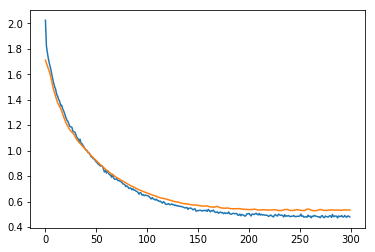

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

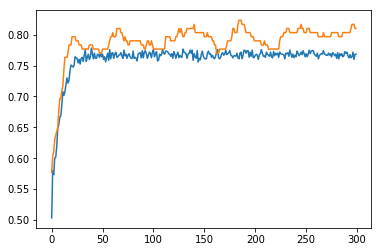

In [164]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

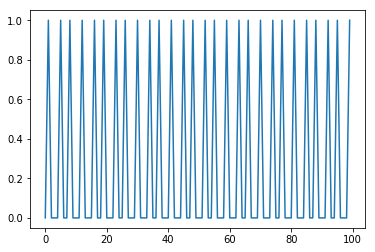

In [158]:
plt.plot(x_train[0,:100,:])

In [106]:
result.shape

NameError: name 'result' is not defined

In [ ]:
n1 = 30
i = 0
plt.subplot(211)
plt.plot(np.arange(n1), results[i][:n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)
plt.subplot(212)

plt.plot(np.arange(n1), x_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

In [24]:
mid = midi.decode_track(context, result)
dn = config.dataset_dir
# io.export_midifile(mid, dn + 'song_seq-seq.mid')

 [DEBUG] > 
 |>  decode_track - input was not MultiTrack.
 |>  Assuming MultiTrack
 [INFO] : 
 |  len, max_t
 |  0
 |  3.0


In [102]:
results = []
latent_samples = []
for seq in x_test[-2:]:
    encoded = encode_sequence(np.stack([seq]))
    latent_samples.append(encoded)
    result = decode_sequence(encoded, encoder_model, decoder_model)
    results.append(result)
results[0].shape

(500, 1)

In [52]:
len(encoded)

2

In [100]:
encoded[0].shape

(1, 64)

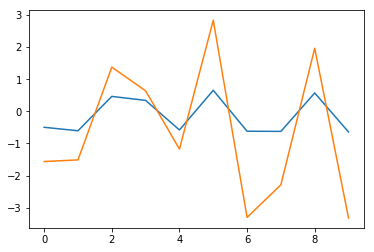

In [62]:
plt.plot(encoded[0][0,:10])
plt.plot(encoded[1][0,:10])

In [196]:
e = np.array(latent_samples)
e.shape

(2, 2, 1, 64)

In [197]:
# reduce dimensionality
# e = e.reshape(e.shape[0],2,e.shape[-1])
e.shape

(2, 2, 1, 64)

In [200]:
e1.mean(axis=0).shape

(1, 64)

2

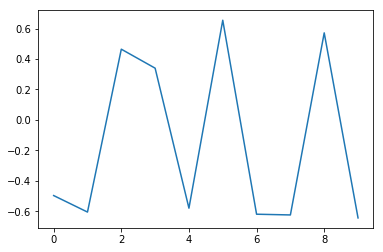

In [201]:
# new = e.transpose().mean(axis=1).transpose()
e1 = e[:,0] # state h
e2 = e[:,1] # state c
new = [e1.mean(axis=0), e2.mean(axis=0)]
# new = [[e[:,i].mean(axis=0)] for i in [0,1]]
plt.plot(new[0][0][:10])
len(new)

In [202]:
e1.mean(axis=0).shape

(1, 64)

In [203]:
l[0].shape

(1, 64)

In [204]:
l = latent_samples[0]
len(l) # latent_sample :: (x,1,64)

2

In [207]:
# new_ = decode_sequence(latent_samples[0], encoder_model, decoder_model)
new_ = decode_sequence(new, encoder_model, decoder_model)

In [210]:
new_.shape

(500, 1)

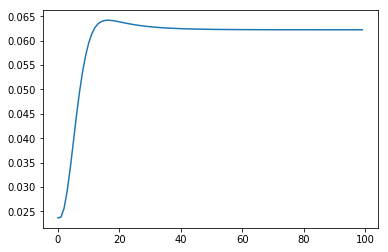

In [226]:
plt.plot(new_[:100])

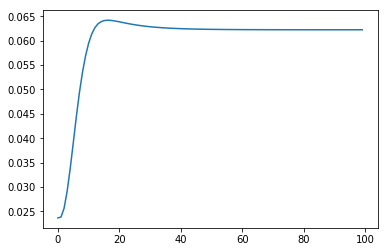

In [231]:
plt.plot(results[0][:100])

In [223]:
# results[0]

In [224]:
mid_new = midi.decode_track(context, results[0])
io.export_midifile(mid_new, config.export_dir + 'real_mid_new_lstm.mid')

 [DEBUG] > 
 |>  decode_track - input was not MultiTrack.
 |>  Assuming MultiTrack
 [INFO] : 
 |  len, max_t
 |  0
 |  3.0


## Alt
Without teacher forcing https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html


<i>"In some niche cases you may not be able to use teacher forcing, because you don't have access to the full target sequences, e.g. if you are doing online training on very long sequences, where buffering complete input-target pairs would be impossible. In that case, you may want to do training by reinjecting the decoder's predictions into the decoder's input, just like we were doing for inference.

You can achieve this by building a model that hard-codes the output reinjection loop: "</i>

In [ ]:
from keras.layers import Lambda
from keras import backend as K

# The first part is unchanged
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
_, state_h, state_c = encoder(encoder_inputs)
states = [state_h, state_c]

# Set up the decoder, which will only process one timestep at a time.
decoder_inputs = Input(shape=(1, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
# output will be a probability distribution over the vectors
decoder_dense = Dense(num_decoder_tokens, activation='softmax')

all_outputs = []
inputs = decoder_inputs
max_decoder_seq_length = 100
for _ in range(max_decoder_seq_length):
    # Run the decoder on one timestep
    outputs, state_h, state_c = decoder_lstm(inputs,
                                             initial_state=states)
    outputs = decoder_dense(outputs)
    # Store the current prediction (we will concatenate all predictions later)
    all_outputs.append(outputs)
    # Reinject the outputs as inputs for the next loop iteration
    # as well as update the states
    inputs = outputs
    states = [state_h, state_c]

# Concatenate all predictions
decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)

# Define and compile model as previously
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# Prepare decoder input data that just contains the start character
# Note that we could have made it a constant hard-coded in the model
decoder_input_data = np.zeros((x_train.shape[0], 1, num_decoder_tokens))

# Train model as previously
model.fit([x_train,y_train], z_train, epochs=10, batch_size=batch_size,
          validation_split=0.2, callbacks=callbacks)

In [ ]:
x_test.shape

In [ ]:
# x_test, y_test = gen_xy_sin_to_f(3, f=2)

In [ ]:
results = model.predict([x_test,x_test])
results.shape

In [ ]:
# the 'true' results
i = 0
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],y_test[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
# predicted results
i = 0
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 2
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 0
selection = 1
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)